# Introduction

For this project, we were to identify the best neighborhood in Pittsburgh. Since 'bestness' is so vague, we decided to identify the best neighborhood according to how ideal it is for cycling. We then decided on three metrics, street signs for safety, traffic count to analyze congestion on the roads, and public art for aestheticism. We wanted to analyze the "best cycling" neighborhood with very different metrics, so we found that safety, congestion/enjoyability, and aesthetic views were fitting for this. When narrowing down data sets, we had considered including a speed hump data set since speed humps can greatly hinder the enjoyability of cycling. However we found out that the majority of the neighborhoods either had no speed humps, or had no data on their speed humps, so we decided to disclude it. Despite this, we believe we narrowed down the data sets and chose the three most fitting ones for determining the best neighborhood in Pittsburgh. 

# Metric: Best Neighborhood for Cycling

To further explain the thought process behind cycling and our individual three metrics, we were considering to include data on safety, enjoyability, bike specific lanes, city bike rentals, road conditions, and many other factors. However due to constraints on what data sets we could find (mainly on wprdc.org), we decided that street signs was a fitting data set to gauge the safety level for cycling since cars speeds and traffic would be more regulated in areas with more street signs. Congestion can be analyzed through the traffic counts data set to further determine which areas are safer/more open to cycling. And the public art data set would gauge the amount of interesting scenery available to cyclists which would enhance the atmosphere of cycling. 



# First, Gauging the Public Art Count in Pittsburgh

To start, we have to import execute the basic pandas imports

In [4]:
#imports
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt



# Counting the Public Art

Next we have to open the public art csv file to read from. Since each row in the csv corresponds to a unique neighborhood neatly described in the neighborhood column, we can simply find the unique neighborhoods in the file then find how many instances of each there are. 

In [9]:
# load data into data frame
dfraw = pd.read_csv("publicart2.csv")


#creates new data frame for neighborhood and number of speedhumps

neighborhood=[]
art=[]


#finds each unique speed hump's neighborhood and adds it to data frame
for element in dfraw["neighborhood"].unique(): #loops through each unique neighborhood from the data frame
    neighborhood.append(element)
    art.append(dfraw['neighborhood'].value_counts()[element])
    
d = {'Neighborhood': neighborhood, 'Public Art': art}
df = pd.DataFrame(data=d)
#outputs
df


,Neighborhood,Public Art
0,Oakwood,1
1,Elliott,3
2,Central Business District,27
3,Carrick,2
4,Brookline,2
5,South Side Slopes,3
6,Hazelwood,3
7,Highland Park,10
8,Squirrel Hill South,20
9,Perry North,2


# Map Visualization

To get a general sense of the comparison between each neighborhood, we made a heatmap to see which neighorboods had more public art pieces and their general locations. 

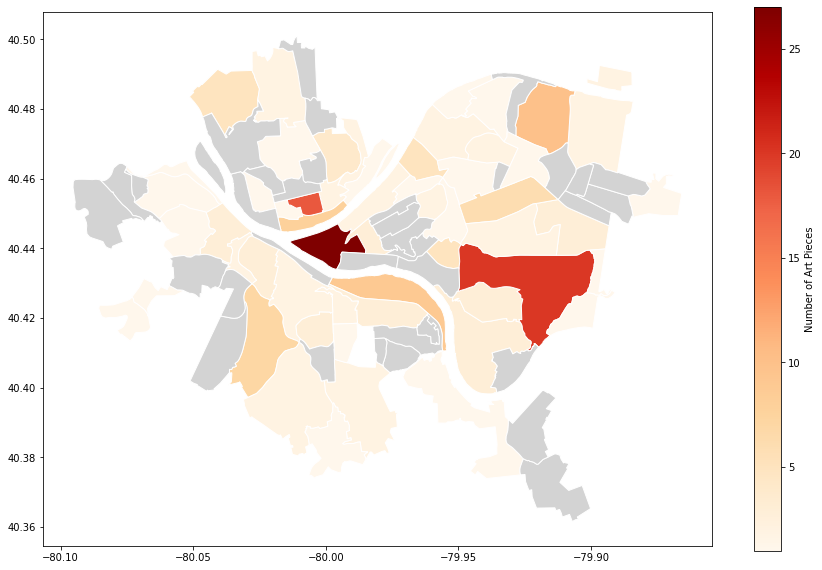

In [11]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile


# merges shape file and data frame
map2 = neighborhoods.merge(df, how='left', left_on='hood', right_on='Neighborhood')


# draw a choropleth map using data 
map2.plot(column='Public Art', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Art Pieces"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )


    



Seemingly heavily concentrated in only a few neighborhoods as seen in the saturated red zones while many other areas have zero art pieces(depicted by the grey zones). Central Business District, Squirrel Hill South, and Alleghany Center performed the best.

# Bar Graph

To more easily see the numerical comparisons, it is clear that the top contenders are Central Business District, Squirrel Hill South, and Alleghany Center are the most prominent while the 4th place is half that of third.

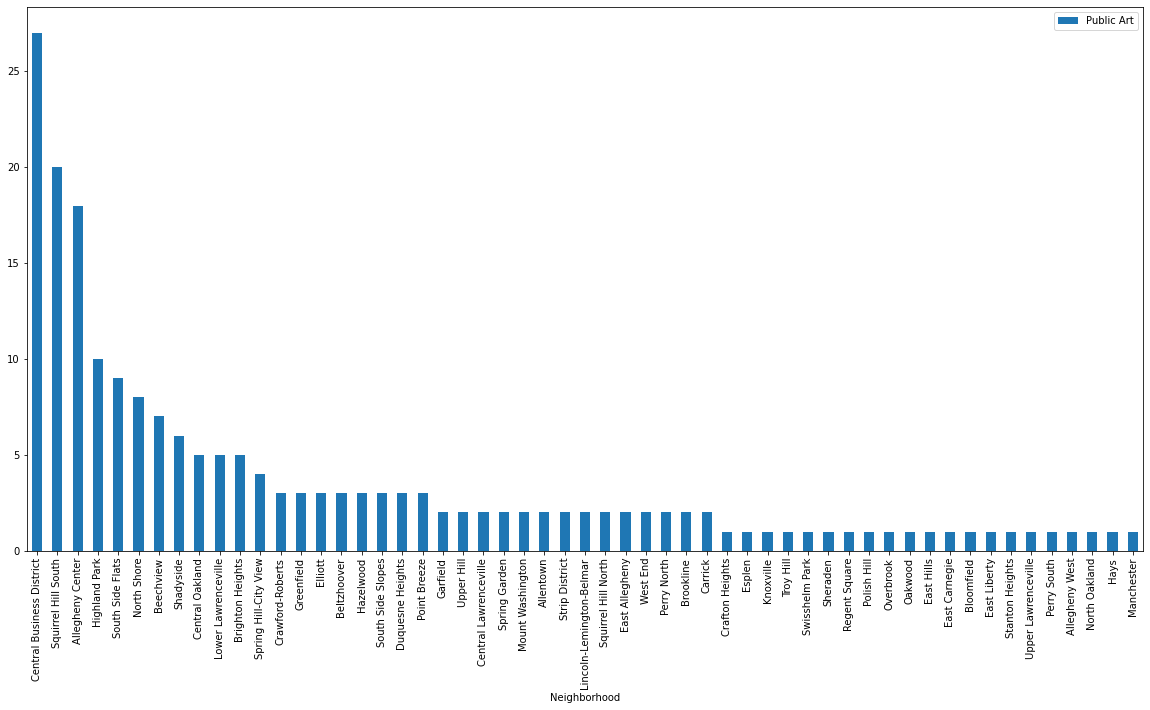

In [12]:
dfSorted=df
dfSorted=dfSorted.sort_values(by='Public Art', ascending=False)
dfSorted.plot.bar(x="Neighborhood", y="Public Art",rot=90, figsize=(20,10))

From the data, we can see that the distribution sorted from highest to lowest is heavily skewed. Therefore when adding together our metrics, it could the scaling could become awkward, so we will try finding a ratio between the number of public art pieces with the size of the neighborhood. We also that that an important part of seeing the public art is not just how many there are, but also how far away they are from each other.

# Neighborhood Size

We will get a csv containing the size of each neighborhood

In [15]:
dfSize = pd.read_csv("neighborhoodSize.csv")
dfSize=dfSize[["Neighborhood_2010_SQMILES", "SNAP_All_csv_Neighborhood"]] #keep only the neighborhood and neighborhood size columns since there were dozens of others that were irrelevant.
dfSize

,Neighborhood_2010_SQMILES,SNAP_All_csv_Neighborhood
0,0.281,Central Oakland
1,0.499,North Oakland
2,0.215,West Oakland
3,0.258,Crawford-Roberts
4,0.608,Strip District
...,...,...
85,0.132,Chartiers City
86,0.369,Ridgemont
87,0.200,West End
88,0.217,California-Kirkbride


# Compare Data to Find Ratio
Now we will use the first data frame to supply the number of public art pieces there are per neighborhood and divide that by the new neighborhood that has each neighborhoods' size in square miles.

In [20]:
sizeDict = dict(zip(dfSize.SNAP_All_csv_Neighborhood, dfSize.Neighborhood_2010_SQMILES))


ratio=[]
for element in dfraw["neighborhood"].unique():
    #dfCombined=dfCombined.append(pd.DataFrame([[element, dfraw['neighborhood'].value_counts()[element]/sizeDict[element]]], columns=["Neighborhood", "Public Art Pieces Per Square Mile : Ratio"])) #adds each neighborhood + its number of speed humps to NEW dataframe
    ratio.append(dfraw['neighborhood'].value_counts()[element]/sizeDict[element])

d2 = {"Neighborhood": neighborhood, "Public Art Pieces Per Square Mile : Ratio":ratio}
dfCombined = pd.DataFrame(data=d2)    
    
dfCombined

,Neighborhood,Public Art Pieces Per Square Mile : Ratio
0,Oakwood,3.968254
1,Elliott,4.950495
2,Central Business District,42.187500
3,Carrick,1.195457
4,Brookline,0.960615
5,South Side Slopes,4.189944
6,Hazelwood,1.895136
7,Highland Park,8.598452
8,Squirrel Hill South,7.487832
9,Perry North,1.650165


# Ratio Bar Graph Visualization

To easily see the number comparison for the art pieces to square mile ratio, we will form a bar graph.

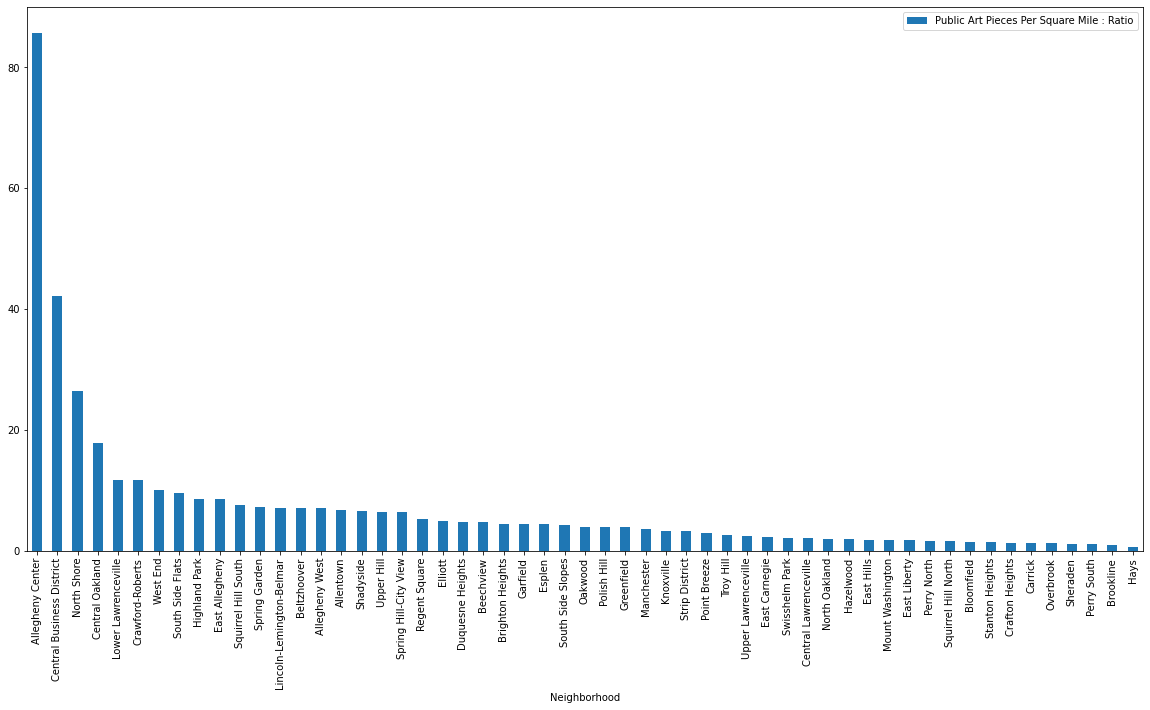

In [24]:
dfSortedCombined=dfCombined
dfSortedCombined=dfSortedCombined.sort_values(by='Public Art Pieces Per Square Mile : Ratio', ascending=False) # to sort the bar graph from greatest to least
dfSortedCombined.plot.bar(x="Neighborhood", y="Public Art Pieces Per Square Mile : Ratio",rot=90, figsize=(20,10))

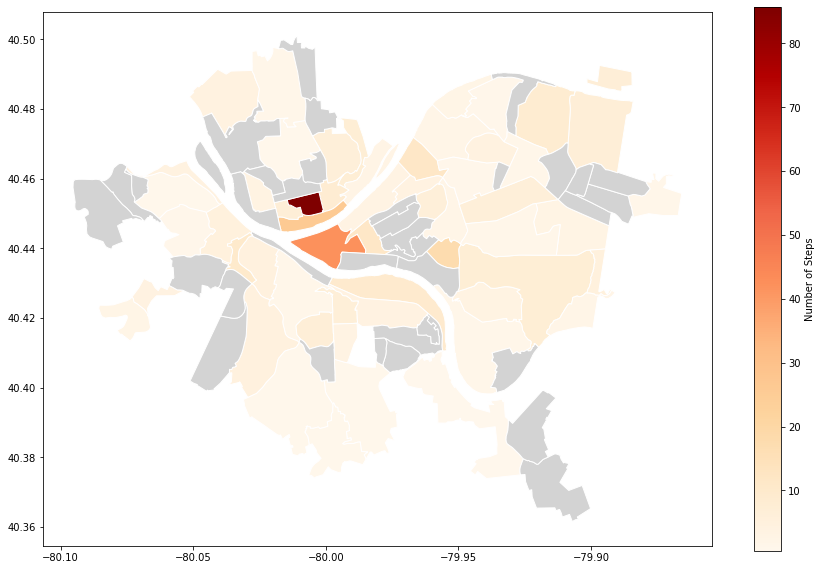

In [25]:
# merges shape file and data frame
mapCombined = neighborhoods.merge(dfSortedCombined, how='left', left_on='hood', right_on='Neighborhood')


# draw a choropleth map using data 
mapCombined.plot(column='Public Art Pieces Per Square Mile : Ratio', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Steps"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )


# For Comparison

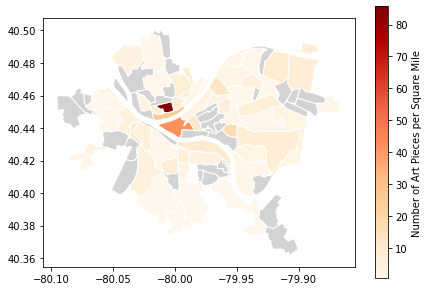

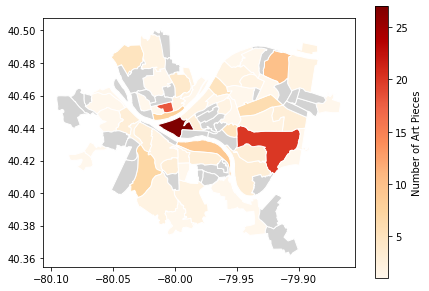

In [26]:
# draw a choropleth map using data 
mapCombined.plot(column='Public Art Pieces Per Square Mile : Ratio', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Art Pieces per Square Mile"}, # label the legend
               figsize=(7, 5),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

map2.plot(column='Public Art', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Art Pieces"}, # label the legend
               figsize=(7, 5),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )




# Public Art Summary

In terms of bestness when evaluating neighborhoods, it is quite evident that the Central Business District, Squirrel Hill South, and Allegheny Center are better. However, many of the neighborhoods in Pittsburgh lack any public art while the majority have a few. Yet as seen in the heat map, we can see that the darker shaded/saturated areas perform signficantly better with the amount of public art available. It is also interesting to note that such regions fall around the center/middle axis of the city. 
From the heat map, we can conclude that Central Business District is the best neighborhood for public art, thus is a contender for the best neighborhood for cycling. 

# -----------------------------------------------------------------------------------------------

# Street Sign Count

--> insert stuff here

# -----------------------------------------------------------------------------------------------


# Traffic Count

--> insert stuff here

# -----------------------------------------------------------------------------------------------


# Combing Metrics

Next, we have to combine the three sub-metrics into one over-arching metric to determine the best neighborhood for cycling. However, since the results from each of our data sets do not use the same scale and don't lend well to combining without bias, we will have to implement a weighting for each sub metric. 

**Public Art**: As we've seen, the bar graph was heavily skewed with a low of around 1 and a high of around 85. Because of this, we decided to first lower the magnitude of these values by square rooting. 

In [37]:
scaledRatio=[]
for num in ratio:
    scaledRatio.append(num**(1/2))

d3 = {"Neighborhood": neighborhood, "Scaled Ratio":scaledRatio}
dfScaled = pd.DataFrame(data=d3) 

For a general sense of what the distribution looks like now:

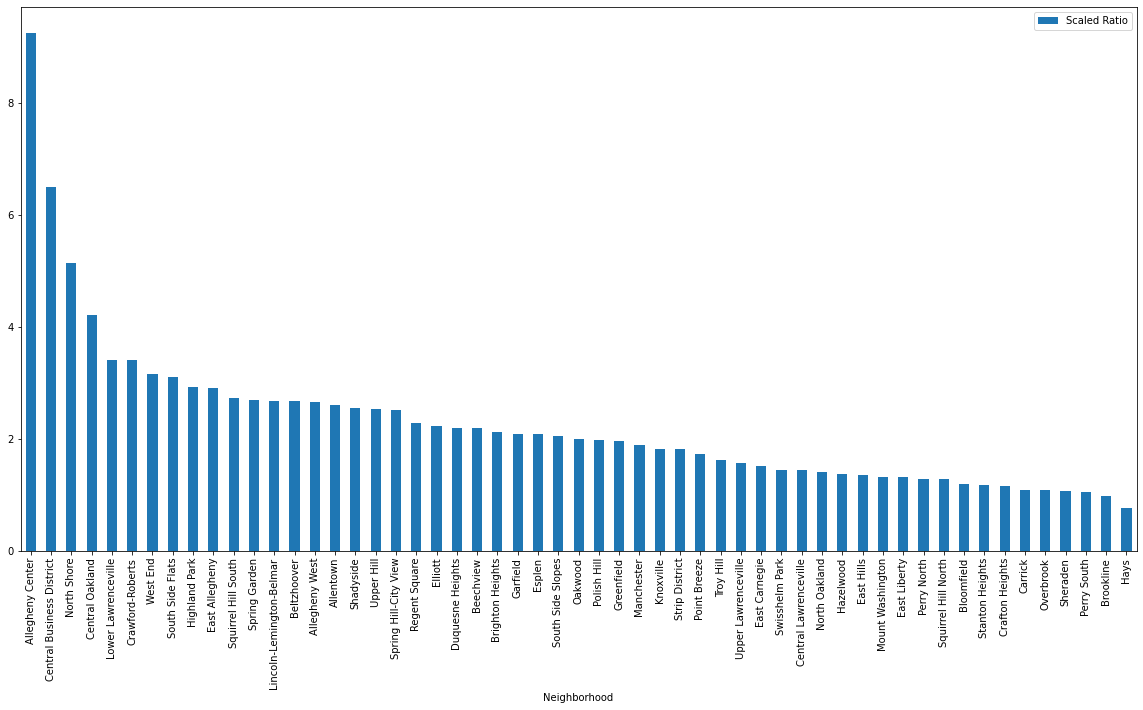

In [36]:
artScaledSorted=dfScaled
artScaledSorted=artScaledSorted.sort_values(by='Scaled Ratio', ascending=False) # to sort the bar graph from greatest to least
artScaledSorted.plot.bar(x="Neighborhood", y="Scaled Ratio",rot=90, figsize=(20,10))

# Next, to scale Traffic Count and Street Sign Count
--> insert stuff